### <font color=black> IMPORT:: <font color=blue> **py modules** </font> </font>

In [4]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap
import glob
import os
import shutil
import re
import cartopy
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import fnmatch
#
PD=os.getcwd(); #PD
#
import fun_pbox as fn

---
## <font color=red> IP:: Load Data  </font>
---

In [5]:
color_SSP119 = np.array([0, 173, 207]) / 255
color_SSP126 = np.array([23, 60, 102]) / 255
color_SSP245 = np.array([247, 148, 32]) / 255
color_SSP370 = np.array([231, 29, 37]) / 255
color_SSP585 = np.array([149, 27, 30]) / 255

loc=0
#
sspDIR = ['/scratch/pk695/FACTS/002_fork/facts/JupNbk/000_pk-JupNb_TESTspace/2023-01_NZ_INSAR/001_DEVEL_Pbox/004_CI_files/medium_confidence/ssp126/',
           '/scratch/pk695/FACTS/002_fork/facts/JupNbk/000_pk-JupNb_TESTspace/2023-01_NZ_INSAR/001_DEVEL_Pbox/004_CI_files/medium_confidence/ssp585/'];
#
# doscens = ['ssp126', 'ssp585']
scentitles = ['SSP1-2.6', 'SSP5-8.5']
#
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

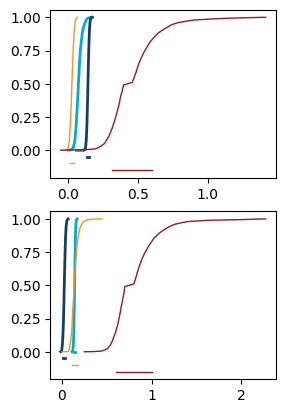

In [6]:
for ss0,ss1 in enumerate(sspDIR):
    files = glob.glob(sspDIR[ss0] + '/*.nc')
    sls = np.empty((0, 0))
    for fn0,fn1 in enumerate(files):
        dataset = xr.open_dataset(fn1)
        time = dataset['years'].values
        subt = np.where(time == 2100)[0][0]
        quant=dataset['quantiles'].values
        subq = np.where(np.isin(quant, [0.17,0.83]))[0]
        #
        # sl = dataset['sea_level_change'].values[subq,subt,loc].T
        sl = dataset['sea_level_change'].values[:,subt,loc].T
        if sls.size == 0: sls = sl
        else: sls=np.vstack((sls,sl))

    # # qlevs = np.arange(0.01, 1.0, 0.01).reshape(1, -1)
    # # qvals = np.quantile(sls, qlevs)
    # # subq = np.where(np.isin(qlevs, [0.17, 0.83]))

    colrs=['color_SSP119','color_SSP126','color_SSP245','color_SSP585']
    lws = [2, 2, 1, 1] * 2
    
    ax1 = plt.subplot(2, 2, 1 + (ss0 ) * 2)
    
    for sss in range(4):
        xx=sls[sss,:]/1000
        xx1=sls[sss,subq]/1000
        yy=dataset['quantiles'].values
        yy1 = [-0.05 * sss] * 2
        ax1.plot(xx, yy, color=eval(f'{colrs[sss]}'), linewidth=lws[sss])
        ax1.plot(xx1,yy1,color=eval(f'{colrs[sss]}'), linewidth=lws[sss])

plt.show()

In [ ]:
dataset

#
---

In [ ]:
for dd0,dd1 in enumerate(doscens):
    files = glob.glob(doscens[dd0] + '/*.nc')
    sls = []
    #
    for fn0,fn1 in enumerate(files):
        dataset = xr.open_dataset(fn1)
        time = dataset['years'].values
        
        sl = dataset['sea_level_change'].values
        subt = np.where((time >= 2020) & (time <= 2100))[0][0]
        sls=np.vstack((sls,sl[subt]))
    
    qlevs = np.arange(0.01:.01:.99)
    qvals = np.quantile(sls, qlevs)
    subq = np.where(np.isin(qlevs, [0.17, 0.83]))

    colrs = [color_SSP119, color_SSP126, color_SSP245, color_SSP585]
    lws = [2, 2, 1, 1] * 2

    ax1 = plt.subplot(2, 2, 1 + (dddd - 1) * 2)
    for sss in range(4):
        ax1.plot(qvals[:, sss] / 1000, qlevs, color=colrs[sss], linewidth=lws[sss])
        ax1.plot(qvals[subq, sss] / 1000, [-0.05 * sss] * 2, color=colrs[sss], linewidth=lws[sss])
    ax1.plot([0, 4], [0, 0], 'k-')
    ax1.set_xlim([0, 3.5])
    ax1.set_ylim([-0.25, 1])
    ax1.set_yticks(np.arange(0, 1.2, 0.2))
    ax1.set_yticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
    ax1.set_title(scentitles[dddd] + ' - Distributions')
    ax1.legend(['ISMIP6', 'LARMIP', 'MICI', 'SEJ'], loc='lower right')
    ax1.set_xlabel('GMSL (m)')
    ax1.set_ylabel('quantile')

    pbox1l = np.min(qvals[:, 0:2], axis=1)
    pbox1h = np.max(qvals[:, 0:2], axis=1)
    pbox2l = np.min(qvals, axis=1)
    pbox2h = np.max(qvals, axis=1)

    ax2 = plt.subplot(2, 2, 2 + (dddd - 1) * 2)
    ax2.fill_betweenx(qlevs, pbox2l / 1000, pbox2h[::-1] / 1000, facecolor=[0.8, 0.8, 1])
    ax2.fill_betweenx(qlevs, pbox1l / 1000, pbox1h[::-1] / 1000, facecolor=[0.4, 0.4, 1])
    ax2.plot([pbox2l[subq[0]] / 1000, pbox2h[subq[1]] / 1000], [-0.1] * 2, color=[0.8, 0.8, 1], linewidth=6)
    ax2.plot([pbox1l[subq[0]] / 1000, pbox1h[subq[1]] / 1000], [-0.1] * 2, color=[0.4, 0.4, 1], linewidth=6)
    ax2.plot([0, 4], [0, 0], 'k-')
    ax2.set_xlim([0, 3.5])
    ax2.set_ylim([-0.25, 1])
    ax2.legend(['Med. conf.', 'Low conf.'], loc='lower right')
    ax2.set_xlabel('GMSL (m)')
    ax2.set_title(scentitles[dddd] + ' - P-Boxes')
    ax2.set_yticks(np.arange(0, 1.2, 0.2))
    ax2.set_ylabel('quantile')

plt.savefig('pboxes.pdf')
plt.show()

plt.figure()

for dddd in range(len(doscens)):
    files = glob.glob(doscens[dddd] + '/*.nc')
    sls = []

    for fn in files:
        # print(fn)
        dataset = xr.open_dataset(fn)
        time = dataset['years'].values
        sl = dataset['sea_level_change'].values
        subt = np.where(time == 2100)[0][0]
        sls.append(sl[subt])

    qlevs = np.arange(0.005, 1, 0.005)
    qvals = np.quantile(sls, qlevs)
    subq = np.where(np.isin(qlevs, [0.17, 0.83]))

    colrs = [color_SSP119, color_SSP126, color_SSP245, color_SSP585]
    lws = [2, 2, 1, 1] * 2

    binwidth = 50
    ax1 = plt.subplot(3, 2, dddd + 1)
    for sss in range(4):
        n, edges = np.histogram(sls[sss], bins=np.arange(0, 4000 + binwidth, binwidth))
        n = n / sum(n) / (binwidth / 1000)
        ax1.plot(0.5 * (edges[1:] + edges[:-1]) / 1000, n, color=colrs[sss], linewidth=lws[sss] / 2)
    ax1.set_xlim([0, 3.5])
    ax1.set_yticklabels([])
    ax1.set_xticklabels([])
    ax1.set_title(scentitles[dddd])
    if dddd == 0:
        ax1.legend(['ISMIP6', 'LARMIP', 'MICI', 'SEJ'], loc='lower right')
    if dddd == 0:
        ax1.set_ylabel('Probability density')

    ax2 = plt.subplot(3, 2, 2 + dddd)
    for sss in range(4):
        ax2.plot(qvals[sss] / 1000, qlevs, color=colrs[sss], linewidth=lws[sss])
        ax2.plot(qvals[subq, sss] / 1000, -0.05 * (sss + 1) * np.ones(2), color=colrs[sss], linewidth=lws[sss])
    ax2.plot([0, 4], [0, 0], 'k-')
    ax2.set_xlim([0, 3.5])
    ax2.set_ylim([-0.25, 1])
    ax2.set_yticks(np.arange(0, 1.2, 0.2))
    ax2.set_xticklabels([])
    if dddd == 0:
        ax2.text(3.2, -0.15, '17th-83rd percentile ranges', horizontalalignment='right', fontangle='italic')
    if dddd == 0:
        ax2.set_ylabel('CDF quantile')
    if dddd == 1:
        ax2.yaxis.set_label_position("right")

    pbox1l = np.min(qvals[:, :2], axis=1)
    pbox1h = np.max(qvals[:, :2], axis=1)
    pbox2l = np.min(qvals, axis=1)
    pbox2h = np.max(qvals, axis=1)

    ax3 = plt.subplot(3, 2, 4 + dddd)
    ax3.fill_betweenx(qlevs, pbox2l / 1000, pbox2h[::-1] / 1000, facecolor=[0.8, 0.8, 1])
    ax3.fill_betweenx(qlevs, pbox1l / 1000, pbox1h[::-1] / 1000, facecolor=[0.4, 0.4, 1])
    ax3.plot([pbox2l[subq[0]] / 1000, pbox2h[subq[1]] / 1000], [-0.1] * 2, color=[0.8, 0.8, 1], linewidth=6)
    ax3.plot([pbox1l[subq[0]] / 1000, pbox1h[subq[1]] / 1000], [-0.1] * 2, color=[0.4, 0.4, 1], linewidth=6)
    ax3.plot([0, 4], [0, 0], 'k-')
    ax3.set_xlim([0, 3.5])
    ax3.set_ylim([-0.25, 1])
    if dddd == 0:
        ax3.legend(['Med. conf.', 'Low conf.'], loc='lower right')
    if dddd == 0:
        ax3.set_ylabel('p-box quantile')
    if dddd == 1:
        ax3.yaxis.set_label_position("right")
    ax3.set_xlabel('GMSL rise in 2100 (m)')

plt.savefig('pboxesB.pdf')
plt.show()


---
## <font color=red> PLT:: PB  </font>
---

In [ ]:
%matplotlib inline